In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_all = pd.read_csv('../reports/windows/results.csv')

## Evaluate ensemble performance

In [3]:
all_w = df_all[df_all['num_samples'] == 'all']

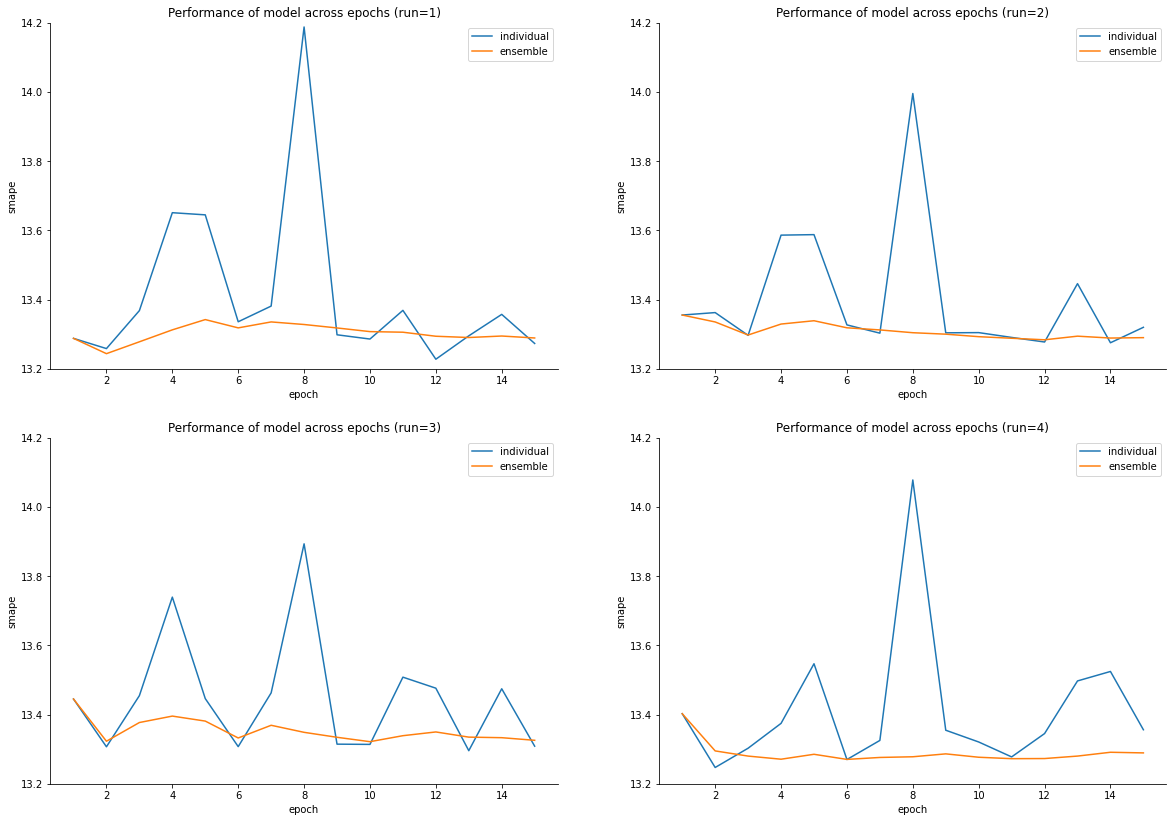

In [63]:
plt.figure(figsize=(20, 14))

for num in range(4):
    ax = plt.subplot(2, 2, num+1)
    a = all_w[all_w['num'] == num]
    ax.plot(range(1, 16), a.loc[~a['ensemble'], 'smape'].values, label='individual')
    ax.plot(range(1, 16), a.loc[a['ensemble'], 'smape'].values, label='ensemble')
    ax.set_ylim([13.2, 14.2])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_title('Performance of model across epochs (run={})'.format(num+1))
    ax.set_ylabel('smape')
    ax.set_xlabel('epoch')
    ax.legend()

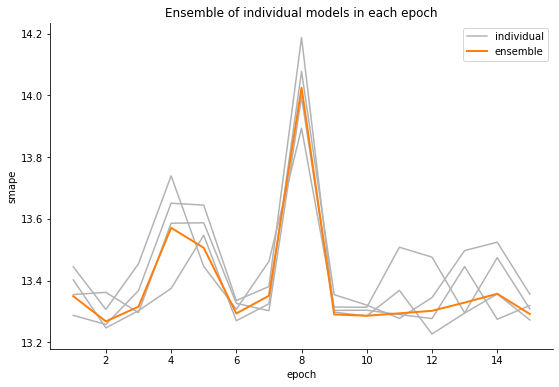

In [66]:
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)

label = None

for num in range(4):
    a = all_w[all_w['num'] == num]
    if num == 3:
        label = 'individual'
    ax.plot(range(1, 16), a.loc[~a['ensemble'], 'smape'].values, c='0.7', label=label)

a = all_w[all_w['num'].isna()].dropna(subset=['epoch'])
ax.plot(range(1, 16), a['smape'].values, c='C1', lw=2, label='ensemble')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Ensemble of individual models in each epoch')
ax.set_ylabel('smape')
ax.set_xlabel('epoch')
ax.legend()

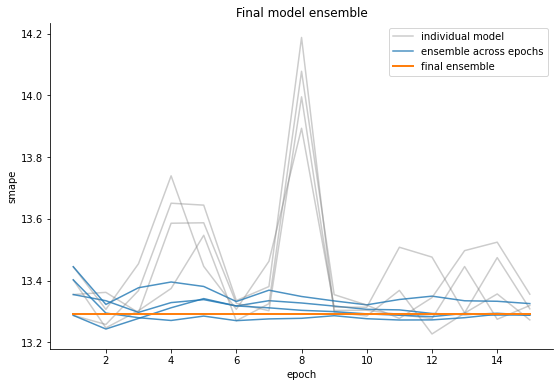

In [65]:
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)

label1 = label2 = None

for num in range(4):
    a = all_w[all_w['num'] == num]
    if num == 3:
        label1 = 'individual model'
        label2 = 'ensemble across epochs'
    ax.plot(range(1, 16), a.loc[~a['ensemble'], 'smape'].values, c='0.5', alpha=0.4, label=label1)
    ax.plot(range(1, 16), a.loc[a['ensemble'], 'smape'].values, c='C0', alpha=0.8, label=label2)

a = all_w[all_w['epoch'].isna()].dropna(subset=['epoch'])
ax.plot([1, 15], list(all_w.loc[all_w['epoch'].isna(), 'smape']) * 2, c='C1', lw=2, label='final ensemble')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Final model ensemble')
ax.set_ylabel('smape')
ax.set_xlabel('epoch')
ax.legend()

## Experiment comparison

In [72]:
df = df_all[(df_all['ensemble']) & ((df_all['epoch'].isna()) | (df_all['epoch'] == 14))]
df['num_samples'] = pd.Categorical(df['num_samples'], ['28k', '56k', '113k', 'all'])

/home/thanos/.envs/aug/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


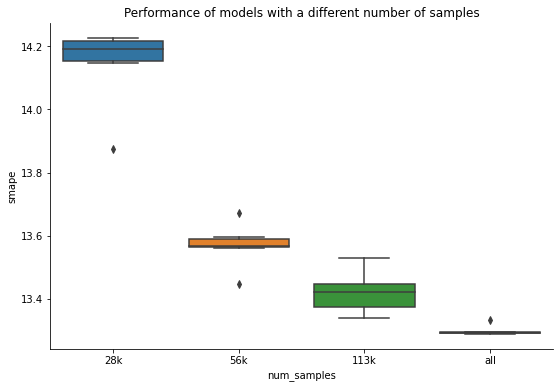

In [77]:
plt.figure(figsize=(9, 6))
ax = sns.boxplot(x='num_samples', y='smape', data=df)

ax.set_title('Performance of models with a different number of samples')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [82]:
df[(df['epoch'].isna())].sort_values('num_samples')[['num_samples', 'smape']]

,num_samples,smape
271,28k,14.145879
407,56k,13.562106
135,113k,13.418041
543,all,13.292263
